<a href="https://colab.research.google.com/github/shubhamraut0209/Data-Analyst-Internship-Projects/blob/main/Airbnb_Price_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** Airbnb Price Prediction Project

**Objective:**  Predict Airbnb listing prices based on location, amenities, and
host reputation.

# **Step 1: Set Up the Environment and Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# **Step 2: Load the Dataset**

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Step 3: Data Exploration**

**3.1 Overview of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**3.2 Unique Values**

In [ ]:
print("Room types:", df['room_type'].unique())

Room types: ['Private room' 'Entire home/apt' 'Shared room']


In [ ]:
print("Neighbourhood Groups:", df['neighbourhood_group'].unique())

Neighbourhood Groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


**3.3 Price Distribution**

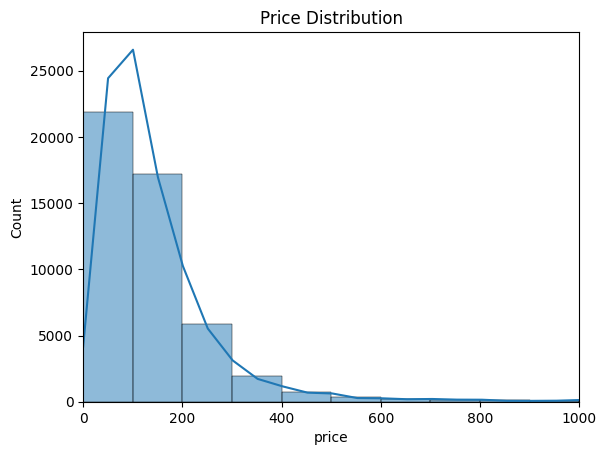

In [ ]:
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Price Distribution")
plt.xlim(0, 1000)  # Cap at 1000 for visibility
plt.show()

**Interpretation:-**    

1.   The price distribution of Airbnb listings is heavily right-skewed, with most listings priced below ₹200.

2.   This indicates that budget accommodations dominate the market, while premium listings are relatively rare.

3.   The skewness may affect model performance, so appropriate transformation or outlier handling will be necessary during preprocessing.

# **Step 4: Data Preprocessing**

**4.1 Remove Outliers**

In [ ]:
df = df[df['price'] <= 500]  # Filter prices > $500

**4.2 Handle Missing Values**

In [ ]:
df.isnull().sum()
df['reviews_per_month'].fillna(0, inplace=True)
df.dropna(inplace=True)  # Drop rows with remaining NaNs

<ipython-input-10-5486c74bfad1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


**4.3 Encode Categorical Features**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# **Step 5: Exploratory Data Analysis (EDA)**

**5.1 Price by Neighborhood Group**

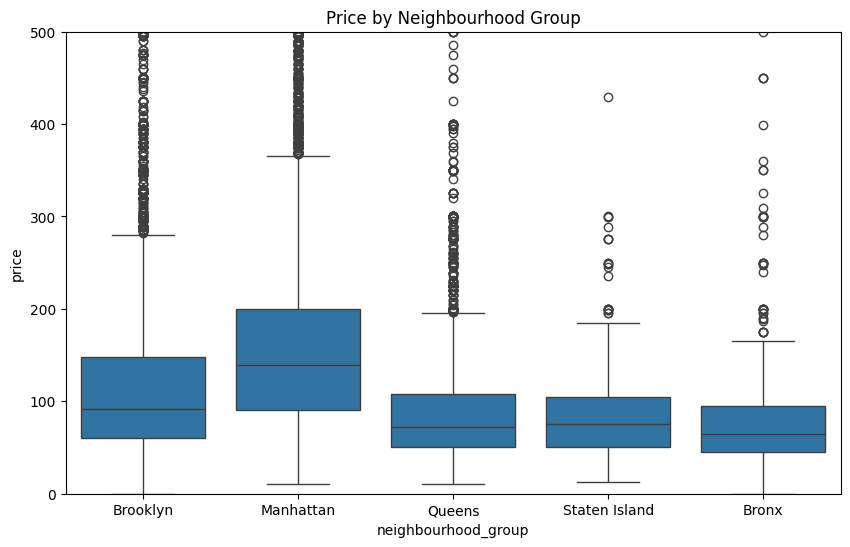

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.ylim(0, 500)
plt.title("Price by Neighbourhood Group")
plt.show()

**Interpretation:-**    

1.   Listing prices vary significantly across neighborhood groups.

2.   Manhattan commands the highest median prices, reflecting its premium market status.

3.   Brooklyn also shows relatively high prices, while Queens, Staten Island, and the Bronx offer more affordable options.

4.   The presence of numerous high-priced outliers in each group suggests the need for careful handling of extreme values in the pricing model.


**5.2 Price by Room Type**

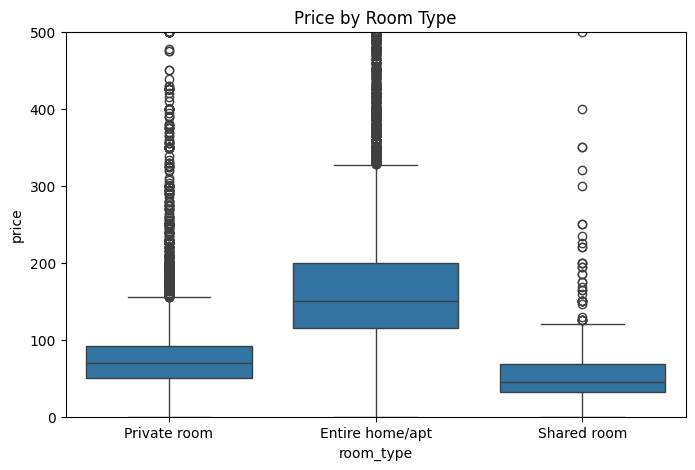

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)
plt.title("Price by Room Type")
plt.show()

**Interpretation:-**   

1.   Room type significantly impacts pricing.

2.   Entire homes/apartments are priced the highest, followed by private rooms, while shared rooms are the most budget-friendly option.

3.   Each category shows outliers, but the overall trend aligns with expected differences in privacy and space.

**5.3 Correlation Heatmap**

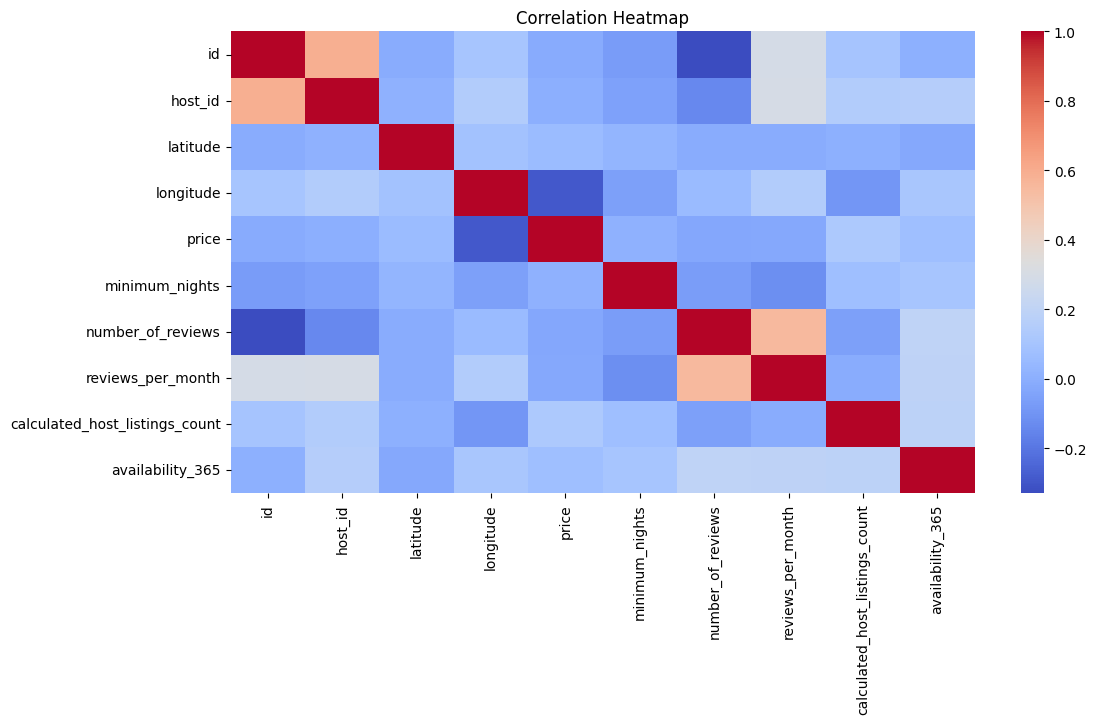

In [ ]:
plt.figure(figsize=(12, 6))
# Only include numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

**Interpretation:-**  

1.   No single variable shows strong correlation with price, suggesting that pricing depends on a combination of factors rather than a dominant one.

2.   However, features like host listing count, availability, and location (longitude) exhibit weak associations and could still contribute to a multivariate model.

# **Step 6: Feature Selection and Model Training**

**6.1 Select Features**

In [ ]:
X = df_encoded[['minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365'] +
               [col for col in df_encoded.columns if 'neighbourhood_group_' in col or 'room_type_' in col]]
y = df_encoded['price']

**6.2 Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6.3 Train Linear Regression**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R^2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression R^2 Score: 0.3981015399731276


**6.4 Train XGBoost**

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R^2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost R^2 Score: 0.457883358001709


# **Step 7: Final Insights & Recommendations**

*   **Manhattan** and **Brooklyn** have the highest number of listings, and Manhattan has higher prices on average.

*   **Private Rooms** are cheaper; **Entire home/apartment** listings are more expensive.

*   Hosts with more listings tend to charge higher prices.

*   **XGBoost** performs better than Linear Regression in this case, with a higher R² score.

*   Most listings with high availability and strong reviews per month can price higher competitively.